## Problema de Pesquisa

Nos contextos judiciais, os _event logs_ frequentemente registram processos de alta complexidade e de natureza não estruturada. Essa complexidade impõe desafios significativos para a análise e modelagem desses processos, afetando a eficácia na identificação de padrões e comportamentos recorrentes que são críticos para a tomada de decisão e a melhoria de procedimentos no sistema judiciário.

## Perguntas de Pesquisa

1. **Complexidade dos Dados**:
   Qual o nível de complexidade dos dados de processos judiciais?

2. **Identificação de Comportamentos**:
   Quais técnicas podem ser aplicadas para identificar os comportamentos de processo mais significativos presentes nos _event logs_ em contexto de processos judiciais? (Similaridade de comportamento)
3. (Method)**Modelagem de Processos e Métricas de Desempenho**:
   Como os processos judiciais podem ser modelados com base nos comportamentos identificados e como avaliar o desempenho dos modelos que representam cada  comportamento descoberto?

4. (Method)**Significado dos Comportamentos**:
   Qual é o significado e as implicações desses comportamentos dentro do contexto judiciário?



Essas perguntas visam desenvolver uma compreensão detalhada dos impactos da complexidade dos processos judiciais nos esforços de modelagem e análise, proporcionando insights para aprimoramentos futuros no sistema judiciário.


In [ ]:
%pip install -U pm4py tqdm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.5 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=13ff17699d33272653dd149015ba5fd85074b316754f8ce06d31bb30d276b408
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
import pm4py

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

CASE_NAME = "case:concept:name"
ACTIVITY_NAME = "concept:name"
TIMESTAMP_NAME = "time:timestamp"

def format_df_to_pm4py(event_log: pd.DataFrame):
    df[CASE_NAME] = df[CASE_NAME].astype(str)
    event_log[TIMESTAMP_NAME] = pd.to_datetime(event_log[TIMESTAMP_NAME])
    return event_log.sort_values([CASE_NAME, TIMESTAMP_NAME])


BASE_PATH = "/content/drive/MyDrive/Experimento" # Pode acabar sendo 'My Drive' também
df = pd.read_csv(f"{BASE_PATH}/juizado_3.csv")
#df = format_df_to_pm4py(df)
df

case:concept:name                               concept:name  \
0                22715390                               Distribuição   
1                22715390                                  Audiência   
2                22715390                                  Audiência   
3                22715390                                  Conclusão   
4                22715390                            Mero expediente   
...                   ...                                        ...   
237297          392017291                                  Conclusão   
237298          392017291  Não-Acolhimento de Embargos de Declaração   
237299          392017291                                    Petição   
237300          392017291                        Trânsito em julgado   
237301          392017291                                 Definitivo   

                    time:timestamp  movimentoID  usuarioID  
0       2022-02-24 04:42:46.773419           26  -44458144  
1       2022-02-24 04:42:49.041419          970  -44458144  
2       2022-02-25 14:44:11.545419          970  -44466948  
3       2022-02-25 14:44:28.040419           51  -44466948  
4       2022-02-25 23:38:15.220419        11010  -44454547  
...                            ...          ...        ...  
237297  2024-02-09 02:08:12.488419           51  -48850835  
237298  2024-02-16 01:27:07.596419          200  -44467934  
237299  2024-02-20 04:02:12.693419           85  -37253061  
237300  2024-02-29 21:59:07.800419          848  -44615457  
237301  2024-02-29 21:59:35.811419          246  -44615457  

[237302 rows x 5 columns]

In [ ]:
len(pm4py.get_variants(format_df_to_pm4py(df)))

6819

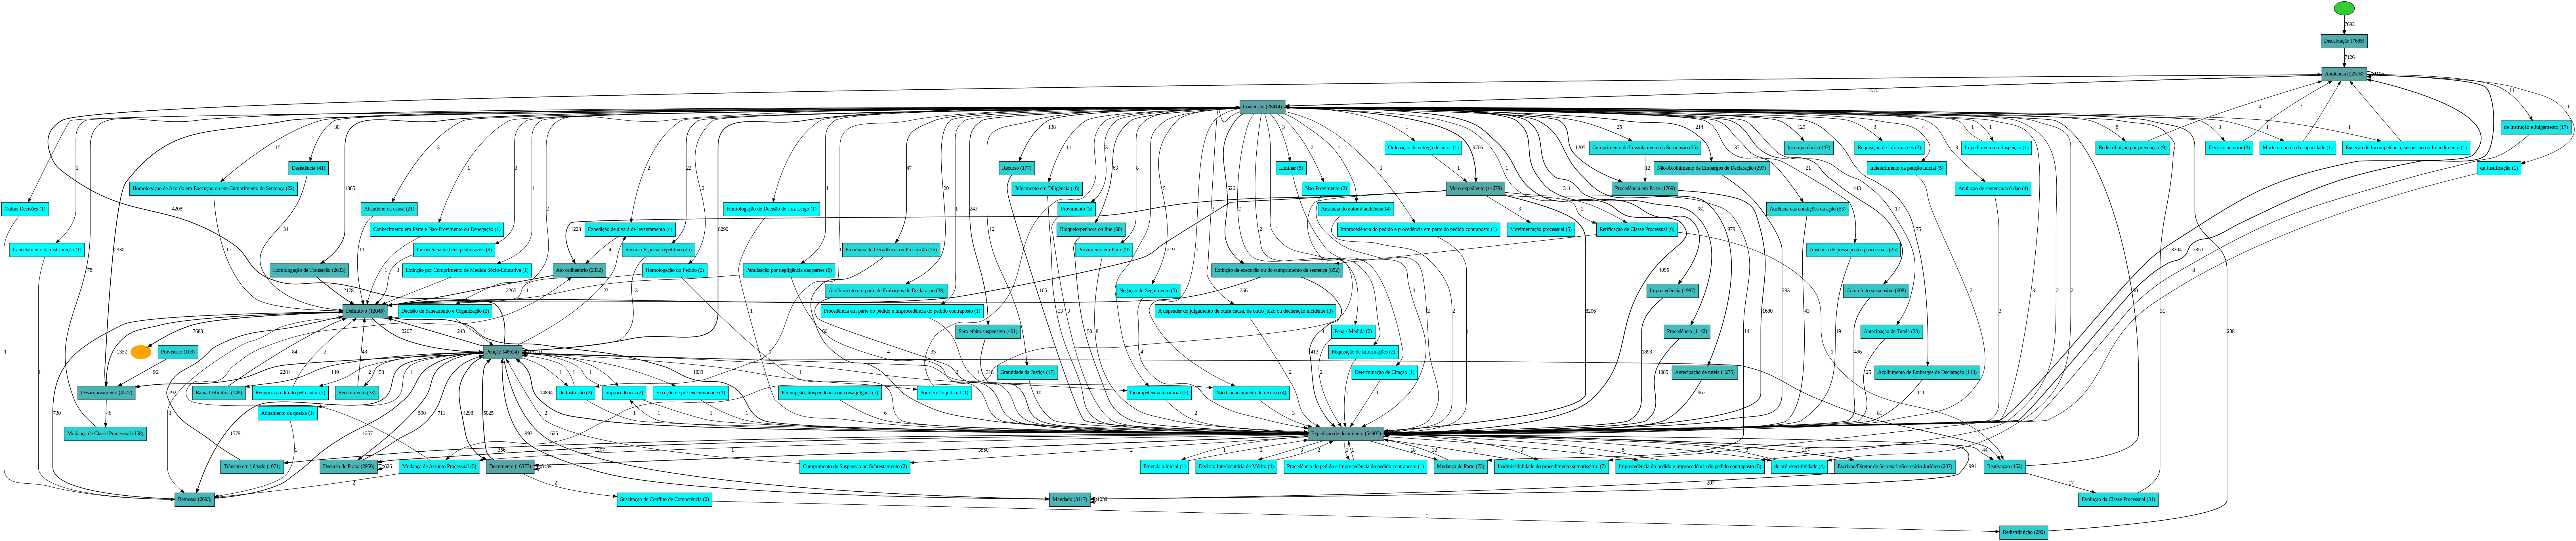

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as hm
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

parameters = {
    "dfg_pre_cleaning_noise_thresh": 0.40
}

heu_net = hm.apply_heu(df,  parameters)

gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Passos da Metodologia de Análise de Clusters

Os quatro passos da metodologia de análise de clusters, conforme descrito no artigo, são:

### 1. Seleção ou Extração de Características
Este é o primeiro passo do processo de clustering, onde são escolhidas as características que melhor distinguem os padrões pertencentes a diferentes clusters. A seleção adequada de características pode simplificar significativamente o processo de análise subsequente e melhorar a eficácia das aplicações de clustering.

### 2. Design ou Seleção do Algoritmo de Clustering
Este passo envolve a escolha do algoritmo de clustering mais apropriado e a definição da medida de proximidade entre os dados. A escolha do algoritmo e da métrica de proximidade tem um impacto direto na formação dos clusters resultantes, tornando-se crucial para a eficácia do processo de clustering.

### 3. Validação dos Clusters
Após a aplicação do algoritmo de clustering, é necessário validar os clusters obtidos para assegurar que eles realmente representam estruturas significativas nos dados e não são meros artefatos do algoritmo utilizado. Essa validação pode ser feita através de critérios:

- **Estrutural:** Examinando a estrutura de clustering diretamente dos dados;
- **Comportamental:** Análise que utiliza métricas essenciais de mineração de processos para avaliar a qualidade dos modelos de cada cluster. Inclui fitness, que mede a adequação do modelo aos dados; precision, que verifica a generalização; f_score, medida que equilibra o fitness e a precisão; além do número médio de atividades por processo e a simplicidade, avaliando a compreensibilidade e usabilidade do modelo.
- **Negociais Quantitativa:** Análise que utiliza a frequência de ocorrência e o lift comparativo para avaliar atividades dentro de cada cluster. Mede a prevalência e a significância de cada atividade, identificando características únicas e influentes que definem os clusters.
- **Negociais Qualitativa:** Avaliação conduzida por especialistas do domínio para interpretar atividades específicas de cada cluster, correlacionando-as com objetivos de negócio e avaliando seu impacto. Essa análise visa identificar comportamentos relevantes identificáveis resultantes de cada cluster.

### 4. Interpretação dos Resultados
O passo final é interpretar os clusters obtidos de forma que eles proporcionem insights úteis a partir dos dados originais. Isso pode envolver a consulta de especialistas na área relevante e, eventualmente, a realização de análises ou experimentos adicionais para garantir a confiabilidade do conhecimento extraído.

> **Nota:** Esses passos estão inter-relacionados e, muitas vezes, o processo de clustering pode exigir iterações entre eles até que se obtenham resultados satisfatórios.


In [ ]:
# Montando o Activity Profile
activity_profile = df.groupby([CASE_NAME, ACTIVITY_NAME]).size().unstack(fill_value=0)
activity_profile_1 = activity_profile.copy()
activity_profile_1

concept:name       A depender do julgamento de outra causa, de outro juízo ou declaração incidente  \
case:concept:name                                                                                    
22716875                                                           0                                 
22725175                                                           0                                 
22728120                                                           0                                 
22730388                                                           0                                 
22731260                                                           0                                 
...                                                              ...                                 
390057462                                                          0                                 
392687391                                                          0                                 
393813230                                                          0                                 
395307813                                                          0                                 
398867816                                                          0                                 

concept:name       Abandono da causa  Acolhimento de Embargos de Declaração  \
case:concept:name                                                             
22716875                           0                                      0   
22725175                           0                                      0   
22728120                           0                                      0   
22730388                           0                                      0   
22731260                           0                                      0   
...                              ...                                    ...   
390057462                          0                                      0   
392687391                          0                                      0   
393813230                          0                                      0   
395307813                          0                                      0   
398867816                          0                                      0   

concept:name       Acolhimento em parte de Embargos de Declaração  \
case:concept:name                                                   
22716875                                                        0   
22725175                                                        0   
22728120                                                        0   
22730388                                                        0   
22731260                                                        0   
...                                                           ...   
390057462                                                       0   
392687391                                                       0   
393813230                                                       0   
395307813                                                       0   
398867816                                                       0   

concept:name       Aditamento da queixa  Antecipação de Tutela  \
case:concept:name                                                
22716875                              0                      0   
22725175                              0                      0   
22728120                              0                      0   
22730388                              0                      0   
22731260                              0                      0   
...                                 ...                    ...   
390057462                             0                      0   
392687391                             0                      0   
393813230                             0                      0   
395307813            

In [ ]:
""" import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Definindo os parâmetros de clustering
n_kmeans = 1
n_agglomerative = 45

# Normalizando os dados
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(activity_profile_1)

# Inicializando colunas
activity_profile_1['cluster'] = None
activity_profile_1['silhouette'] = None

# Aplicando K-means ou Agglomerative Clustering conforme as condições
if n_kmeans == 1 and n_agglomerative != 1:
    # Aplicando Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_agglomerative)
    cluster_labels = agglomerative.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

elif n_agglomerative == 1 and n_kmeans != 1:
    # Aplicando K-means
    kmeans = KMeans(n_clusters=n_kmeans, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

elif n_kmeans != 1 and n_agglomerative != 1:
    # Aplicando K-means seguido por Agglomerative dentro de cada cluster do K-means
    kmeans = KMeans(n_clusters=n_kmeans, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    activity_profile_1['kmeans_cluster'] = kmeans_labels

    # Aplicando Agglomerative Clustering para cada cluster do K-means
    for i in range(n_kmeans):
        cluster_data = df_scaled[activity_profile_1['kmeans_cluster'] == i]
        if len(cluster_data) > 1:
            agglomerative = AgglomerativeClustering(n_clusters=n_agglomerative)
            sub_cluster_labels = agglomerative.fit_predict(cluster_data)
            activity_profile_1.loc[activity_profile_1['kmeans_cluster'] == i, 'agglomerative_cluster'] = sub_cluster_labels
        else:
            activity_profile_1.loc[activity_profile_1['kmeans_cluster'] == i, 'agglomerative_cluster'] = 0

    # Combinando os labels de clusters para um único identificador e calculando silhueta
    activity_profile_1['cluster'] = activity_profile_1.apply(
        lambda row: f"{row['kmeans_cluster']}-{str(int(row['agglomerative_cluster']))}", axis=1)
    silhouette_vals = silhouette_samples(df_scaled, activity_profile_1['cluster'])
    activity_profile_1['silhouette'] = silhouette_vals

# Exibindo resultados
print(activity_profile_1[['cluster', 'silhouette']]) """


' import numpy as np\nfrom sklearn.metrics import silhouette_samples\nfrom sklearn.cluster import KMeans, AgglomerativeClustering\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Definindo os parâmetros de clustering\nn_kmeans = 1\nn_agglomerative = 45\n\n# Normalizando os dados\nscaler = MinMaxScaler()\ndf_scaled = scaler.fit_transform(activity_profile_1)\n\n# Inicializando colunas\nactivity_profile_1[\'cluster\'] = None\nactivity_profile_1[\'silhouette\'] = None\n\n# Aplicando K-means ou Agglomerative Clustering conforme as condições\nif n_kmeans == 1 and n_agglomerative != 1:\n    # Aplicando Agglomerative Clustering\n    agglomerative = AgglomerativeClustering(n_clusters=n_agglomerative)\n    cluster_labels = agglomerative.fit_predict(df_scaled)\n    activity_profile_1[\'cluster\'] = cluster_labels\n    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)\n    activity_profile_1[\'silhouette\'] = silhouette_vals\n\nelif n_agglomerative == 1 and n_kmeans != 1:\n    # 

In [ ]:
# Configurações para testar
configs = {
    'K-means': {'n_clusters': 45},
    'DBSCAN': {'eps': 0.179915822768605, 'min_samples': 10},
    'AHC': {'n_clusters': 48, 'linkage': 'ward'},
    'HDBSCAN': {'min_cluster_size': 275}
}

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN, HDBSCAN, AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math

# Inicializando uma lista para armazenar os resultados
results = []

# Normalizando os dados
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(activity_profile_1)

# Inicializando colunas
activity_profile_1['cluster'] = None
activity_profile_1['silhouette'] = None

# Definindo variáveis booleanas para escolher os métodos de clusterização
use_hdbscan = True
use_dbscan = False
use_ahc = False
use_kmeans = False

cut_value = 0.05 * len(activity_profile_1)  # valor mínimo de pontos para um cluster ser considerado representativo

# Medindo o tempo de execução
start_time = time.time()

# Executando HDBSCAN
if use_hdbscan:
    print("\nHDBSCAN\n", "=" * 50)
    min_cluster_size = configs['HDBSCAN']['min_cluster_size']  # Selecionando uma configuração
    model = HDBSCAN(min_cluster_size=min_cluster_size, n_jobs=-1)
    cluster_labels = model.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

# Executando DBSCAN
if use_dbscan:
    print("\nDBSCAN\n", "=" * 50)
    eps, min_samples = configs['DBSCAN']['eps'], configs['DBSCAN']['min_samples']
    model = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = model.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

# Executando AHC
if use_ahc:
    print("\nAHC\n", "=" * 50)
    n_clusters, linkage = configs['AHC']['n_clusters'], configs['AHC']['linkage']
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = model.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

# Executando K-means
if use_kmeans:
    print("\nK-means\n", "=" * 50)
    n_clusters = configs['K-means']['n_clusters']
    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(df_scaled)
    activity_profile_1['cluster'] = cluster_labels
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    activity_profile_1['silhouette'] = silhouette_vals

# Exibindo resultados
print(activity_profile_1[['cluster', 'silhouette']])



HDBSCAN
concept:name       cluster  silhouette
case:concept:name                     
22716875                 0    0.439878
22725175                 3    0.487259
22728120                -1   -0.543843
22730388                 2    0.679498
22731260                 2    0.718778
...                    ...         ...
390057462                2    0.789779
392687391               -1   -0.361189
393813230                2    0.789428
395307813                2    0.788179
398867816                2    0.789428

[7683 rows x 2 columns]


In [ ]:
import pandas as pd

# Suponha que 'activity_profile_1' é o seu DataFrame que inclui os dados de clustering

# Calculando a média dos scores de silhouette para clusters combinados
combined_silhouette_avg = activity_profile_1.groupby('cluster')['silhouette'].mean().sort_values(ascending=False)

# Calculando a contagem de casos para clusters combinados
combined_count = activity_profile_1['cluster'].value_counts().sort_values(ascending=False)

# Criando uma DataFrame com as métricas dos clusters com mais volumes de dados
# Para este exemplo, vamos considerar os top 5 clusters com mais dados
top_clusters = combined_count.head(20).index
metrics_table = pd.DataFrame({
    'Cluster Label': top_clusters,
    'Count': combined_count[top_clusters].values,
    'Average Silhouette Score': combined_silhouette_avg[top_clusters].values
})

# Ordenando a tabela pela contagem de pontos (volumes de dados)
metrics_table.sort_values(by='Count', ascending=False, inplace=True)

# Exibindo a tabela
print(metrics_table)

   Cluster Label  Count  Average Silhouette Score
0             -1   3289                 -0.339323
1              2   1937                  0.707492
2              0   1358                  0.528798
3              1    823                  0.454954
4              3    276                  0.613392


<ipython-input-50-5dab8a6552f4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='silhouette', data=activity_profile_1, order=cluster_order_raw, ax=ax, palette='Set3')


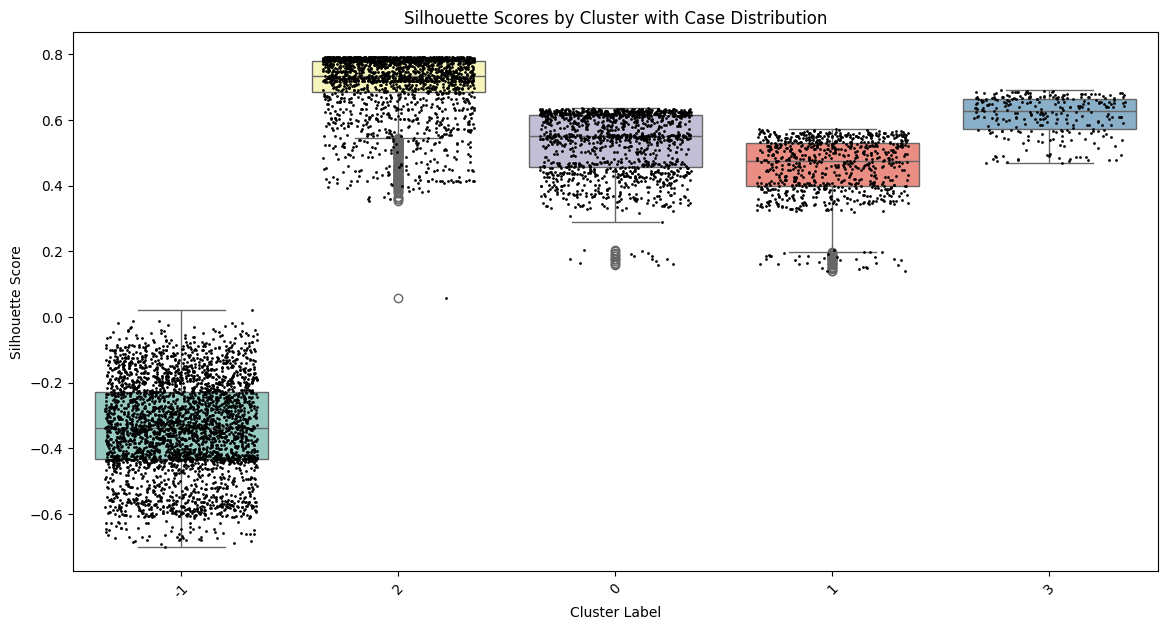

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts_raw = activity_profile_1['cluster'].value_counts()
cluster_order_raw = cluster_counts_raw.index.tolist()


fig, ax = plt.subplots(figsize=(14, 7))

sns.boxplot(x='cluster', y='silhouette', data=activity_profile_1, order=cluster_order_raw, ax=ax, palette='Set3')
sns.stripplot(x='cluster', y='silhouette', data=activity_profile_1, order=cluster_order_raw, ax=ax, color='black', size=2, jitter=0.35)

ax.set_xlabel('Cluster Label')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores by Cluster with Case Distribution')
plt.xticks(rotation=45)

plt.show()

**IQR (Amplitude Interquartílica):** É a diferença entre o terceiro quartil (Q3, o valor abaixo do qual estão 75% dos dados) e o primeiro quartil (Q1, o valor abaixo do qual estão 25% dos dados).

- **Fator 1.5 (abordagem tradicional):** Limites mais amplos, menos agressivo na remoção de outliers.
- **Fator 1.0:** Limites mais próximos dos quartis, removendo mais dados considerados outliers.
- **Fator 0.75:** Limites ainda mais apertados, removendo uma quantidade significativa de dados, sendo a abordagem mais agressiva.


In [ ]:
cluster_counts_raw

cluster
-1    3289
 2    1937
 0    1358
 1     823
 3     276
Name: count, dtype: int64

<ipython-input-52-0384f62ca6e9>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_df = pd.concat([filtered_df, filtered_group])
<ipython-input-52-0384f62ca6e9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='silhouette', data=activity_profile_no_outliers, order=cluster_order, ax=ax, palette='Set3')


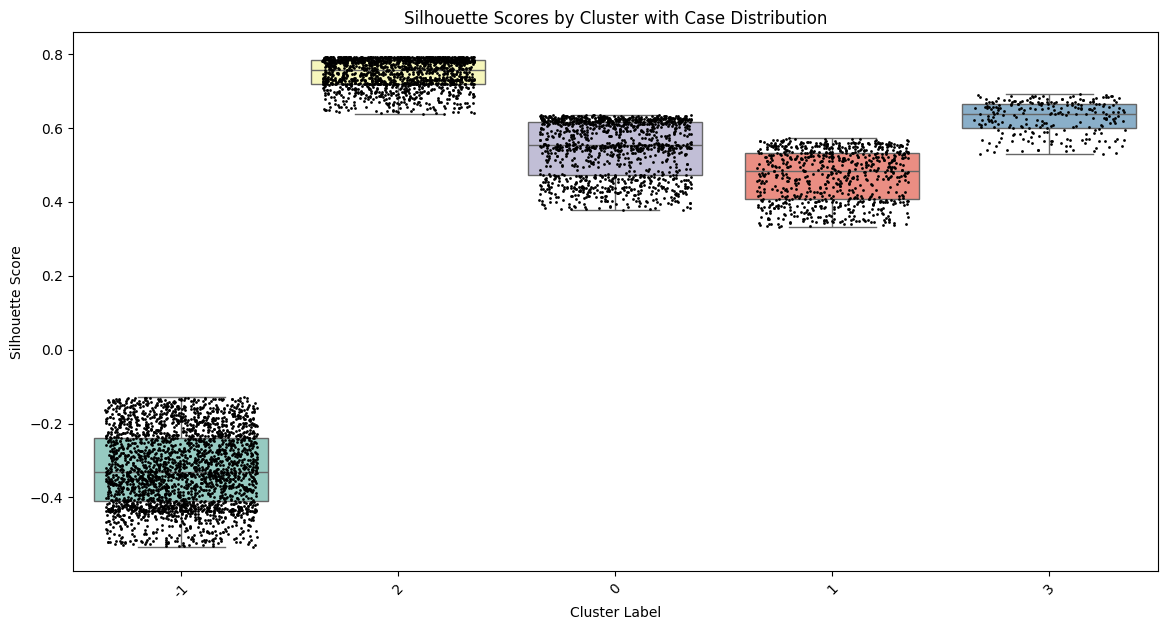

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para remover outliers com base no IQR
def remove_outliers(df, col_group, col_value):
    filtered_df = pd.DataFrame(columns=df.columns)  # DataFrame vazio para armazenar dados sem outliers

    # Itera sobre cada grupo (cluster)
    for name, group in df.groupby(col_group):
        Q1 = group[col_value].quantile(0.25)
        Q3 = group[col_value].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.5 * IQR
        upper_bound = Q3 + 0.5 * IQR

        # Filtra valores dentro dos limites
        filtered_group = group[(group[col_value] >= lower_bound) & (group[col_value] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, filtered_group])

    return filtered_df

# Remover outliers do DataFrame original
activity_profile_no_outliers = remove_outliers(activity_profile_1, 'cluster', 'silhouette')

# Redefinir a contagem e ordem dos clusters após a remoção dos outliers
cluster_counts = activity_profile_no_outliers['cluster'].value_counts()
cluster_order = cluster_counts.index.tolist()

# Criar o gráfico sem outliers
fig, ax = plt.subplots(figsize=(14, 7))

sns.boxplot(x='cluster', y='silhouette', data=activity_profile_no_outliers, order=cluster_order, ax=ax, palette='Set3')
sns.stripplot(x='cluster', y='silhouette', data=activity_profile_no_outliers, order=cluster_order, ax=ax, color='black', size=2, jitter=0.35)

ax.set_xlabel('Cluster Label')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores by Cluster with Case Distribution')
plt.xticks(rotation=45)

plt.show()

In [ ]:
df_scaled_no_outliers = activity_profile_no_outliers.drop(["cluster","silhouette"], axis=1)

# Normalizando os dados
scaler = MinMaxScaler()
df_scaled_no_outliers = scaler.fit_transform(df_scaled_no_outliers)
df_scaled_no_outliers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(df_scaled_no_outliers,
                                     activity_profile_no_outliers['cluster'])

activity_profile_no_outliers["silhouette"] = silhouette_vals
combined_silhouette_avg = activity_profile_no_outliers.groupby('cluster')['silhouette'].mean().sort_values(ascending=False)
combined_count = activity_profile_no_outliers['cluster'].value_counts().sort_values(ascending=False)

total_casos = df['case:concept:name'].nunique()

# Calcular o limite de 5% do total de casos
limite_5 = total_casos * 0.05



top_clusters = combined_count.head(40).index
metrics_table = pd.DataFrame({
    'Cluster Label': top_clusters,
    'Count': combined_count[top_clusters].values,
    'Raw Count': cluster_counts_raw[top_clusters].values,
    'Average Silhouette Score': combined_silhouette_avg[top_clusters].values
})
metrics_table.sort_values(by=["Count"],
                          ascending=False, inplace=True)

# Filtrar os clusters com contagem maior que 5% do total de casos

top_clusters = metrics_table[metrics_table['Raw Count'] > limite_5]
#top_clusters = top_clusters[top_clusters["Cluster Label"] != -1]

top_labels = top_clusters['Cluster Label']

top_clusters


Cluster Label  Count  Raw Count  Average Silhouette Score
0            -1   2655       3289                 -0.270449
1             2   1577       1937                  0.717237
2             0   1254       1358                  0.401224
3             1    771        823                  0.293172

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

def tsne(profile, n_clusters):

  # Limitar n_clusters a no máximo 10
  n_clusters = min(n_clusters, 10)

  # Definir uma paleta de cores
  colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']

  # Normalizando os dados
  scaler = MinMaxScaler()
  df_scaled_tsne = scaler.fit_transform(profile.drop(['cluster', 'silhouette'], axis=1))

  # Identificar os principais clusters
  cluster_counts = profile['cluster'].value_counts()
  top_clusters = cluster_counts.nlargest(n_clusters).index.tolist()
  color_map = dict(zip(top_clusters, colors[:n_clusters]))
  default_color = 'gray'  # Cor para os demais clusters

  # Mapear cores aos clusters
  mapped_colors = [color_map.get(label, default_color) for label in profile['cluster']]

  # Executando t-SNE
  tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
  tsne_results = tsne.fit_transform(df_scaled_tsne)

  # Plotando os Resultados do t-SNE
  plt.figure(figsize=(12,8))
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=mapped_colors, alpha=0.7)

  # Criando uma legenda para os clusters destacados
  for label, color in color_map.items():
      plt.scatter([], [], color=color, label=f'Cluster {label}')
  plt.scatter([], [], color=default_color, label='Other Clusters')

  plt.legend()
  plt.title('t-SNE projection of the data')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()


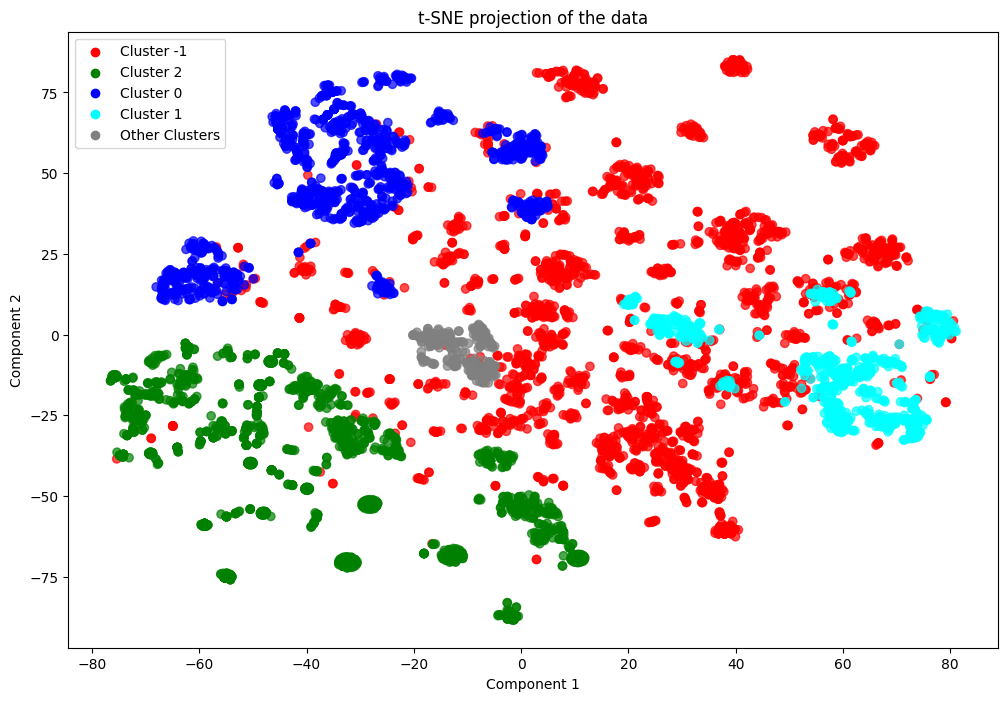

In [ ]:
tsne(activity_profile_no_outliers, len(top_labels))

In [ ]:
from pm4py.algo.evaluation.precision.variants import etconformance_token as precision_token_based
from pm4py.algo.evaluation.algorithm import apply as f1_score
from pm4py.algo.discovery.heuristics import algorithm as hm
from tqdm.contrib.concurrent import process_map
from pm4py.convert import convert_to_petri_net
import pm4py

parameters = {
    "dfg_pre_cleaning_noise_thresh": 0.40
}

def get_case_avg_fitness(args: tuple[pd.DataFrame, str, list]):
    event_log, case_id, model_items = args
    trace = event_log[event_log[CASE_NAME] == case_id]
    # metrics = f1_score(trace, *model_items)
    # return case_id, metrics["fscore"]

    precision = precision_token_based.apply(trace, *model_items)
    return case_id, precision

def get_cluster_fitness_metrics(event_log: pd.DataFrame, pn_items):
    lowest_fitness = 0
    highest_fitness = 0
    highest_fitness_case = None
    case_list = event_log[CASE_NAME].unique()
    case_amount = event_log[CASE_NAME].nunique()

    args_list = [(event_log, case_id, pn_items) for case_id in case_list]
    fitness_values = process_map(get_case_avg_fitness, args_list, leave=True,
                                 chunksize=10, total=case_amount, position=0)

    for case_id, fitness in fitness_values:
        if fitness > highest_fitness:
            highest_fitness = fitness
            highest_fitness_case = case_id
        if lowest_fitness == 0 or fitness < lowest_fitness:
            lowest_fitness = fitness

    return highest_fitness_case, lowest_fitness

def get_cluster_events(dataframe: pd.DataFrame, activity_profile: pd.DataFrame,
                       cluster: int) -> pd.DataFrame:
    mask = activity_profile["cluster"] == cluster
    npus = activity_profile[mask].index
    return dataframe[dataframe[CASE_NAME].isin(npus)]

In [ ]:
activity_profile_no_outliers = activity_profile_no_outliers[activity_profile_no_outliers['cluster'].isin(top_labels)]
cluster_names = sorted(activity_profile_no_outliers["cluster"].unique())
cluster_names

[-1, 0, 1, 2]

## CITAR: A Study Into the Factors That Influence the Understandability of Business Process Models

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as hm
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.objects.heuristics_net.obj import HeuristicsNet


def calculate_cfc(heu_net: HeuristicsNet):
    cfc = 0
    # Preparando um dicionário para contar saídas de cada atividade
    activity_outputs = {}
    for (source, target), count in heu_net.dfg.items():
        if source in activity_outputs:
            activity_outputs[source].add(target)
        else:
            activity_outputs[source] = {target}

    # Calculando CFC baseado em múltiplas saídas
    for source, targets in activity_outputs.items():
        if len(targets) > 1:
            cfc += len(targets)  # Soma o número de saídas únicas como contribuição ao CFC

    return cfc

def calculate_cnc(heu_net):
    # Contar o número de nós (atividades)
    number_of_nodes = len(heu_net.activities)

    # Contar o número de conexões únicas (arcos)
    number_of_arcs = len(heu_net.dfg)

    # Calcular o CNC
    if number_of_nodes > 0:
        cnc = number_of_arcs / number_of_nodes
    else:
        cnc = 0  # Evitar divisão por zero

    return cnc

# Lista de logs de eventos
filtered_df = []
for cluster in cluster_names:
    filtered_df.append(get_cluster_events(df, activity_profile_no_outliers, cluster))

event_logs = filtered_df
court_names = []
court_names.append('R')
for i in cluster_names:
  court_names.append(i)


parameters = {
    "dfg_pre_cleaning_noise_thresh": 0.40
}

#heu_net = hm.apply_heu(event_log_hm,  parameters)
#heu_net = hm.apply_heu(filtered_eventlog,  parameters)

heu_net = hm.apply_heu(df,  parameters)

# Calcular o número de nós (atividades)
number_of_nodes = len(heu_net.activities)

# Calcular o número de arcos (conexões entre as atividades)
number_of_arcs = len(heu_net.dfg)

# Calcular a densidade, se possível
if number_of_nodes > 1:
    max_possible_arcs = number_of_nodes * (number_of_nodes - 1)  # direcionado sem laços
    density = number_of_arcs / max_possible_arcs
else:
    density = 0

# Lista para armazenar os resultados
results = []

# Calculando o CFC
cfc_value = calculate_cfc(heu_net)

# Calculando o CNC
cnc_value = calculate_cnc(heu_net)

results.append({
        "Clusters": court_names[0],
        "Number of Nodes": number_of_nodes,
        "Number of Arcs": number_of_arcs,
        #"Density": density,
        "CFC": cfc_value,
        #"CNC": cnc_value
    })


# Processar cada log de eventos
for i, event_log in enumerate(event_logs):
    # Aplicar o algoritmo Heuristics Miner
    heu_net = hm.apply_heu(event_log, parameters=parameters)  # Desempacotar a tupla corretamente

    # Calcular o número de nós (atividades)
    number_of_nodes = len(heu_net.activities)  # Assumindo que 'heu_net' é o objeto correto agora

    # Contar a quantidade de conexões únicas no DFG
    number_of_arcs = len(heu_net.dfg)

    # Calcular a densidade, se possível
    if number_of_nodes > 1:
        max_possible_arcs = number_of_nodes * (number_of_nodes - 1)  # direcionado sem laços
        density = number_of_arcs / max_possible_arcs
    else:
        density = 0

    cfc_value = calculate_cfc(heu_net)
    cnc_value = calculate_cnc(heu_net)

    # Adicionar os resultados à lista
    results.append({
        "Clusters": court_names[i+1],
        "Number of Nodes": number_of_nodes,
        "Number of Arcs": number_of_arcs,
        #"Density": density,
        "CFC": cfc_value,
        #"CNC": cnc_value
    })



# Converter a lista de resultados em um DataFrame do Pandas para visualização tabular
results_df = pd.DataFrame(results)

# Adicionando a coluna 'complexity' que é a soma de 'Number of Nodes', 'Number of Arcs' e 'CFC'
results_df['complexity'] = results_df['Number of Nodes'] + results_df['Number of Arcs'] + results_df['CFC']

# Normalizando a coluna 'complexity' com MinMaxScaler
scaler = MinMaxScaler()
results_df['complexity_normalized'] = scaler.fit_transform(results_df[['complexity']])

# Invertendo a normalização (1 - valor atual) e renomeando como 'simplicity'
results_df['simplicity'] = 1 - results_df['complexity_normalized']

# Ajustando a coluna 'simplicity' para exibir valores com até 8 casas decimais
results_df['simplicity'] = results_df['simplicity'].round(8)

simplicity_top_clusters = results_df[0:6]


In [ ]:
simplicity_top_clusters

Clusters  Number of Nodes  Number of Arcs  CFC  complexity  \
0        R              101             233  155         489   
1       -1               92             210  140         442   
2        0               23              61   52         136   
3        1               24              61   52         137   
4        2               14              33   27          74   

   complexity_normalized  simplicity  
0               1.000000   -0.000000  
1               0.886747    0.113253  
2               0.149398    0.850602  
3               0.151807    0.848193  
4               0.000000    1.000000

############# Cluster -1 ###############


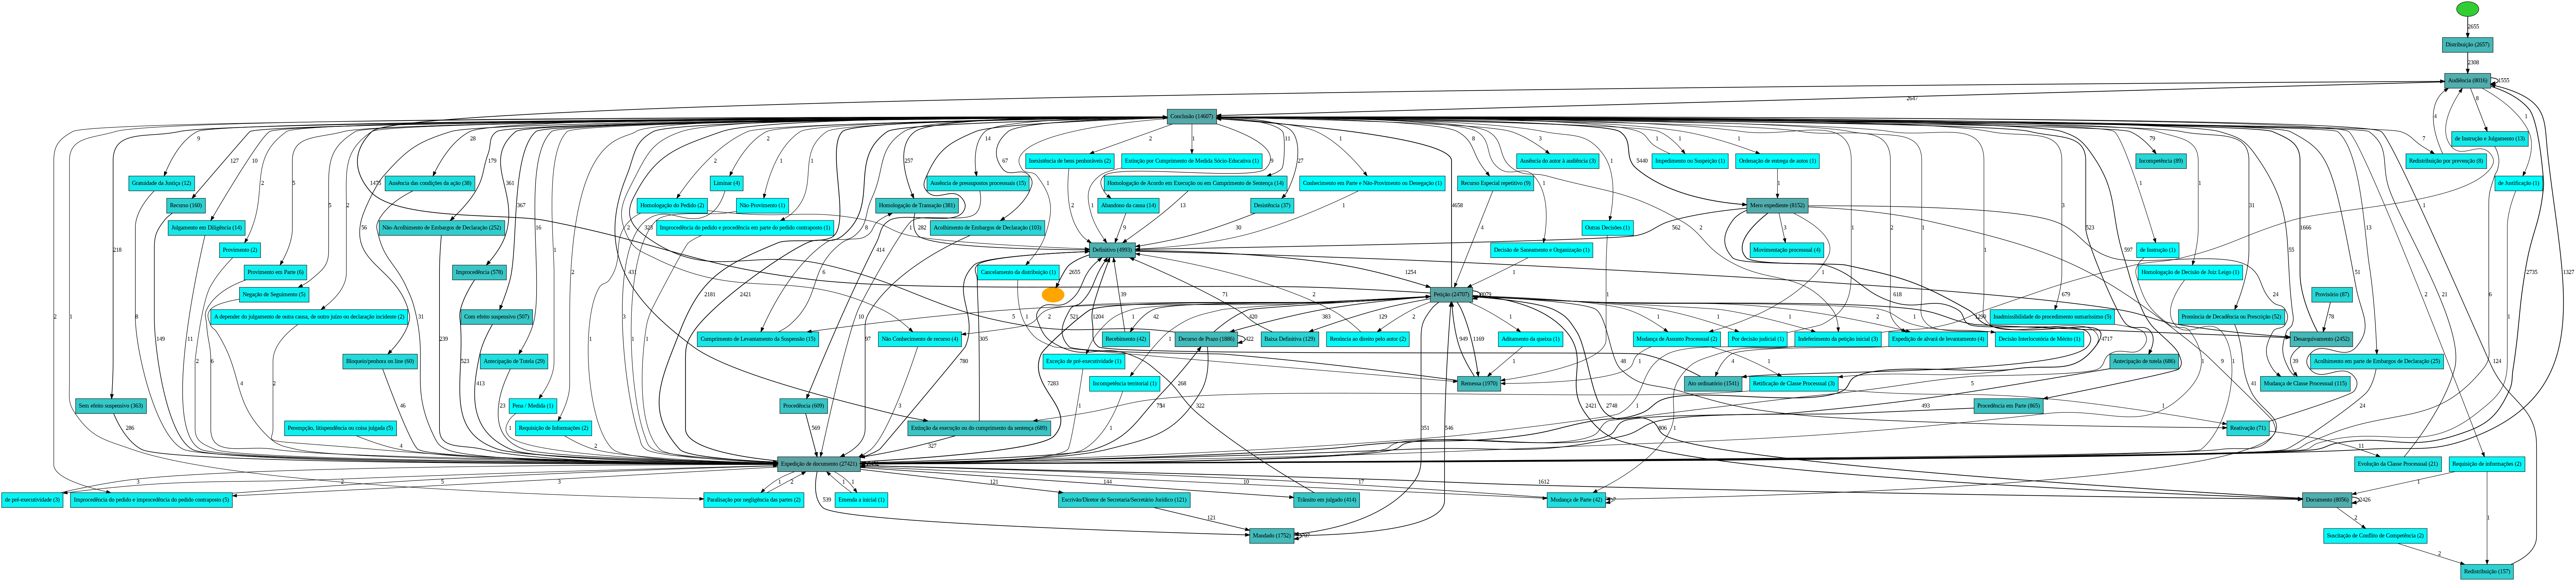

############# Cluster 2 ###############


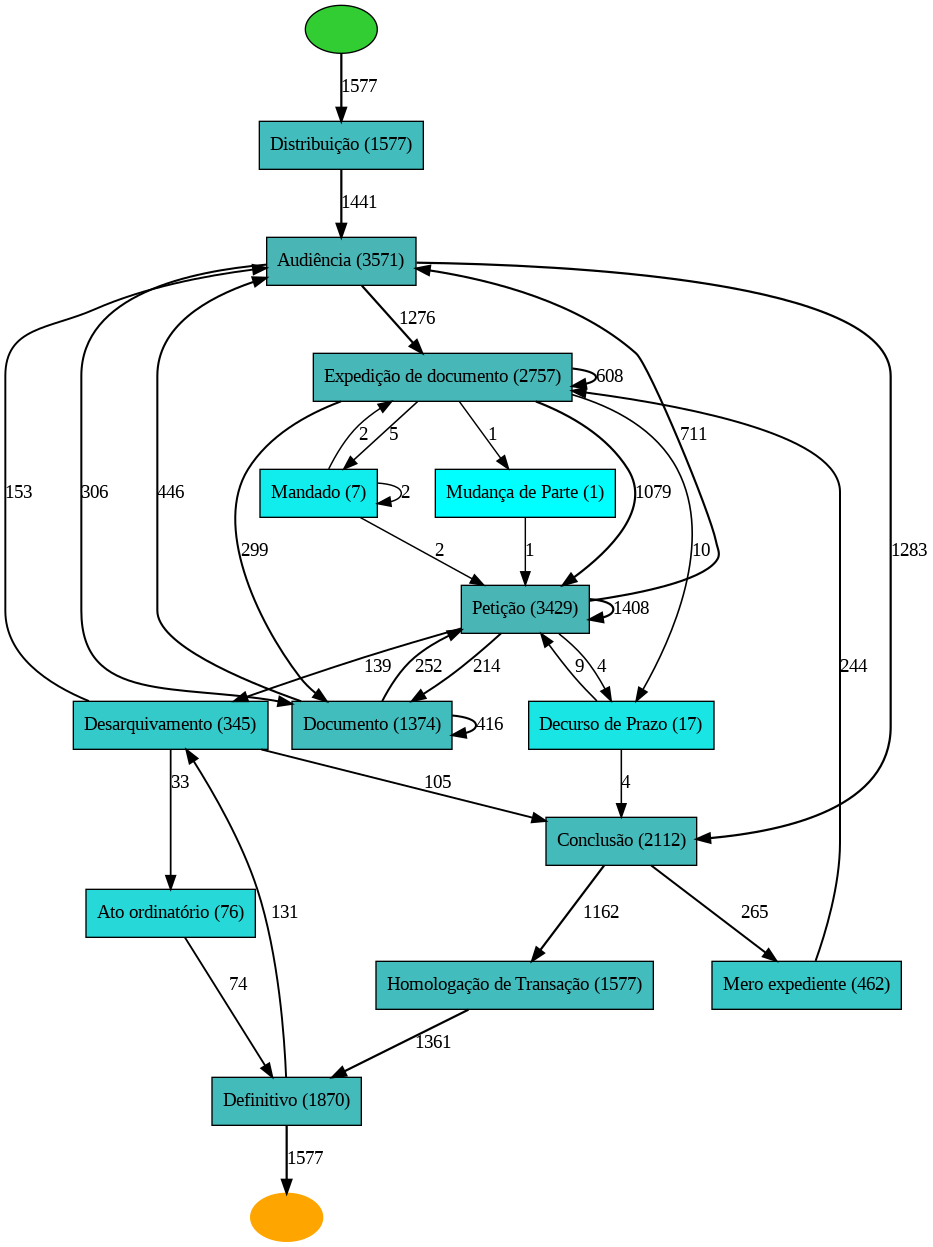

############# Cluster 0 ###############


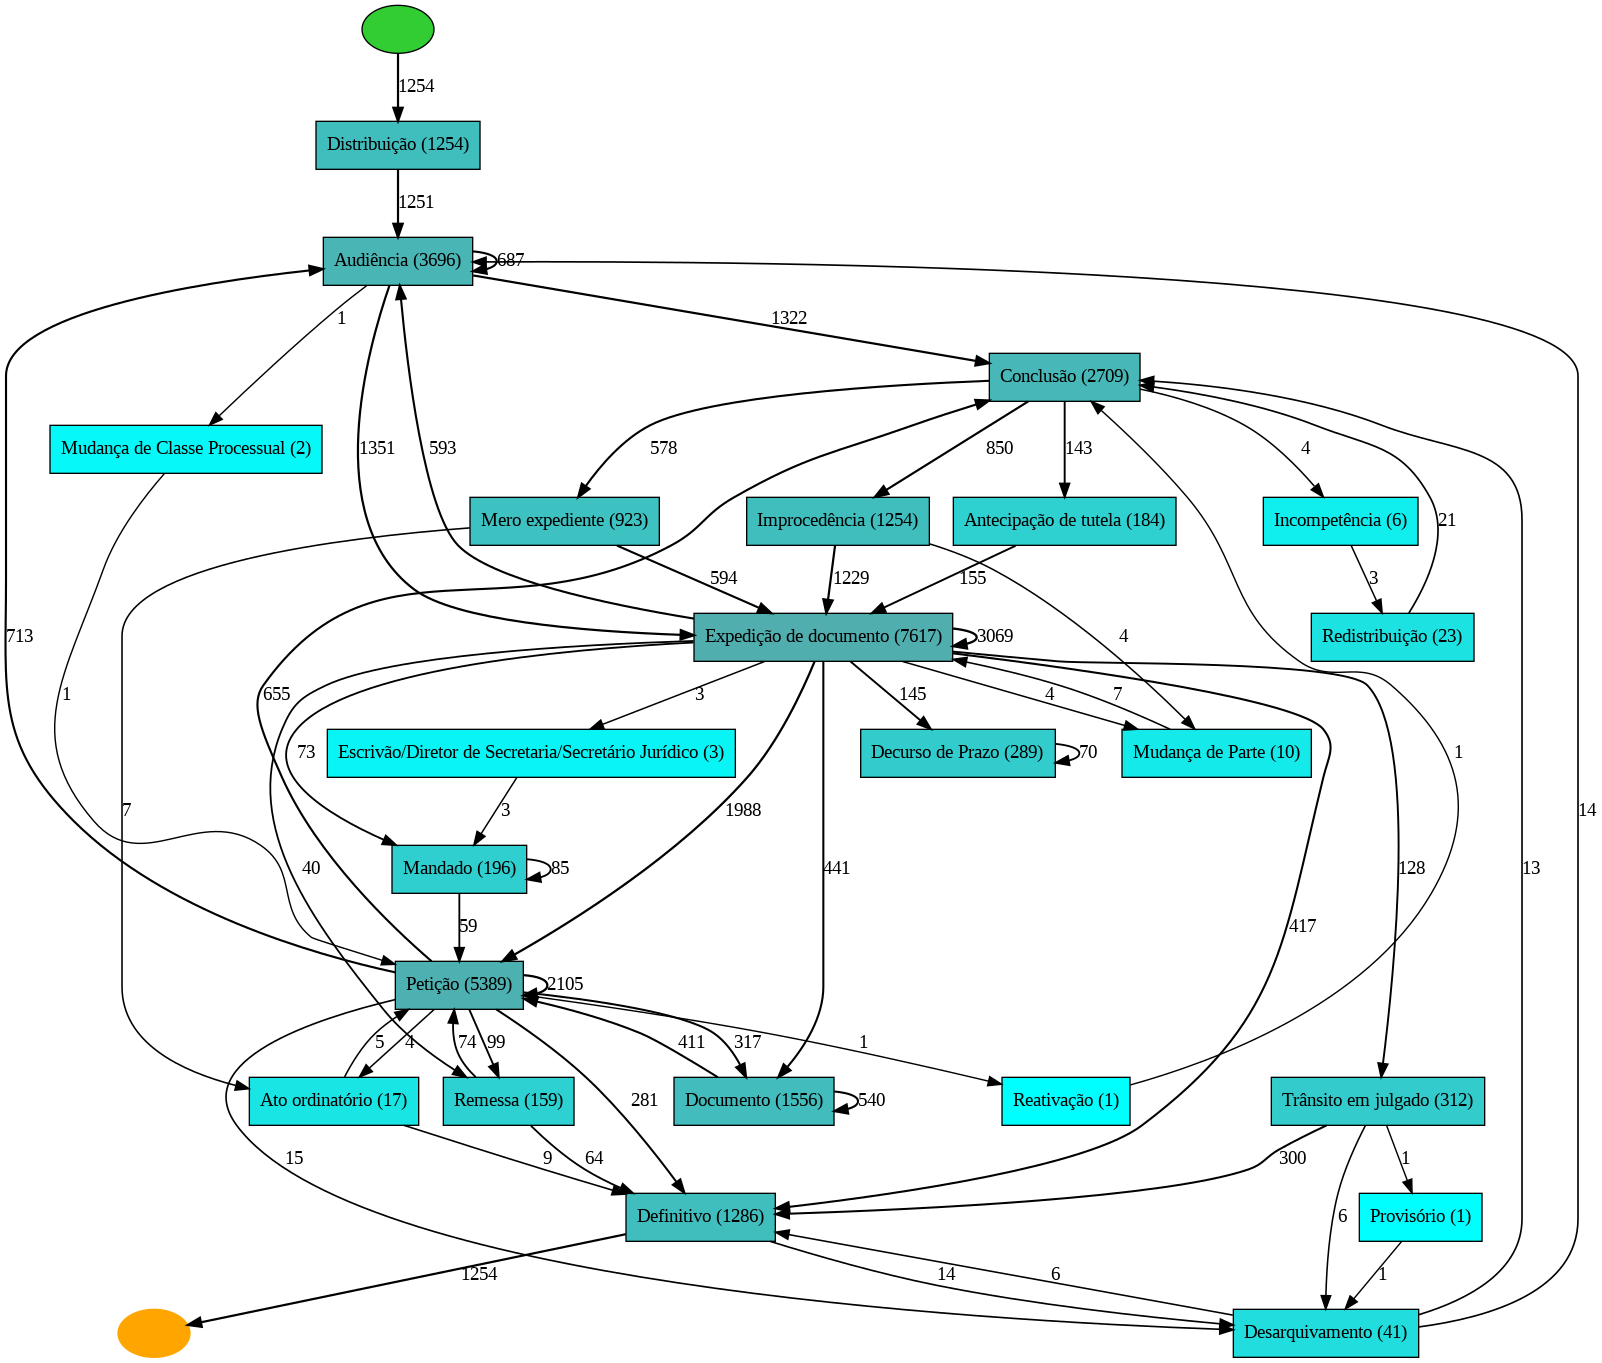

############# Cluster 1 ###############


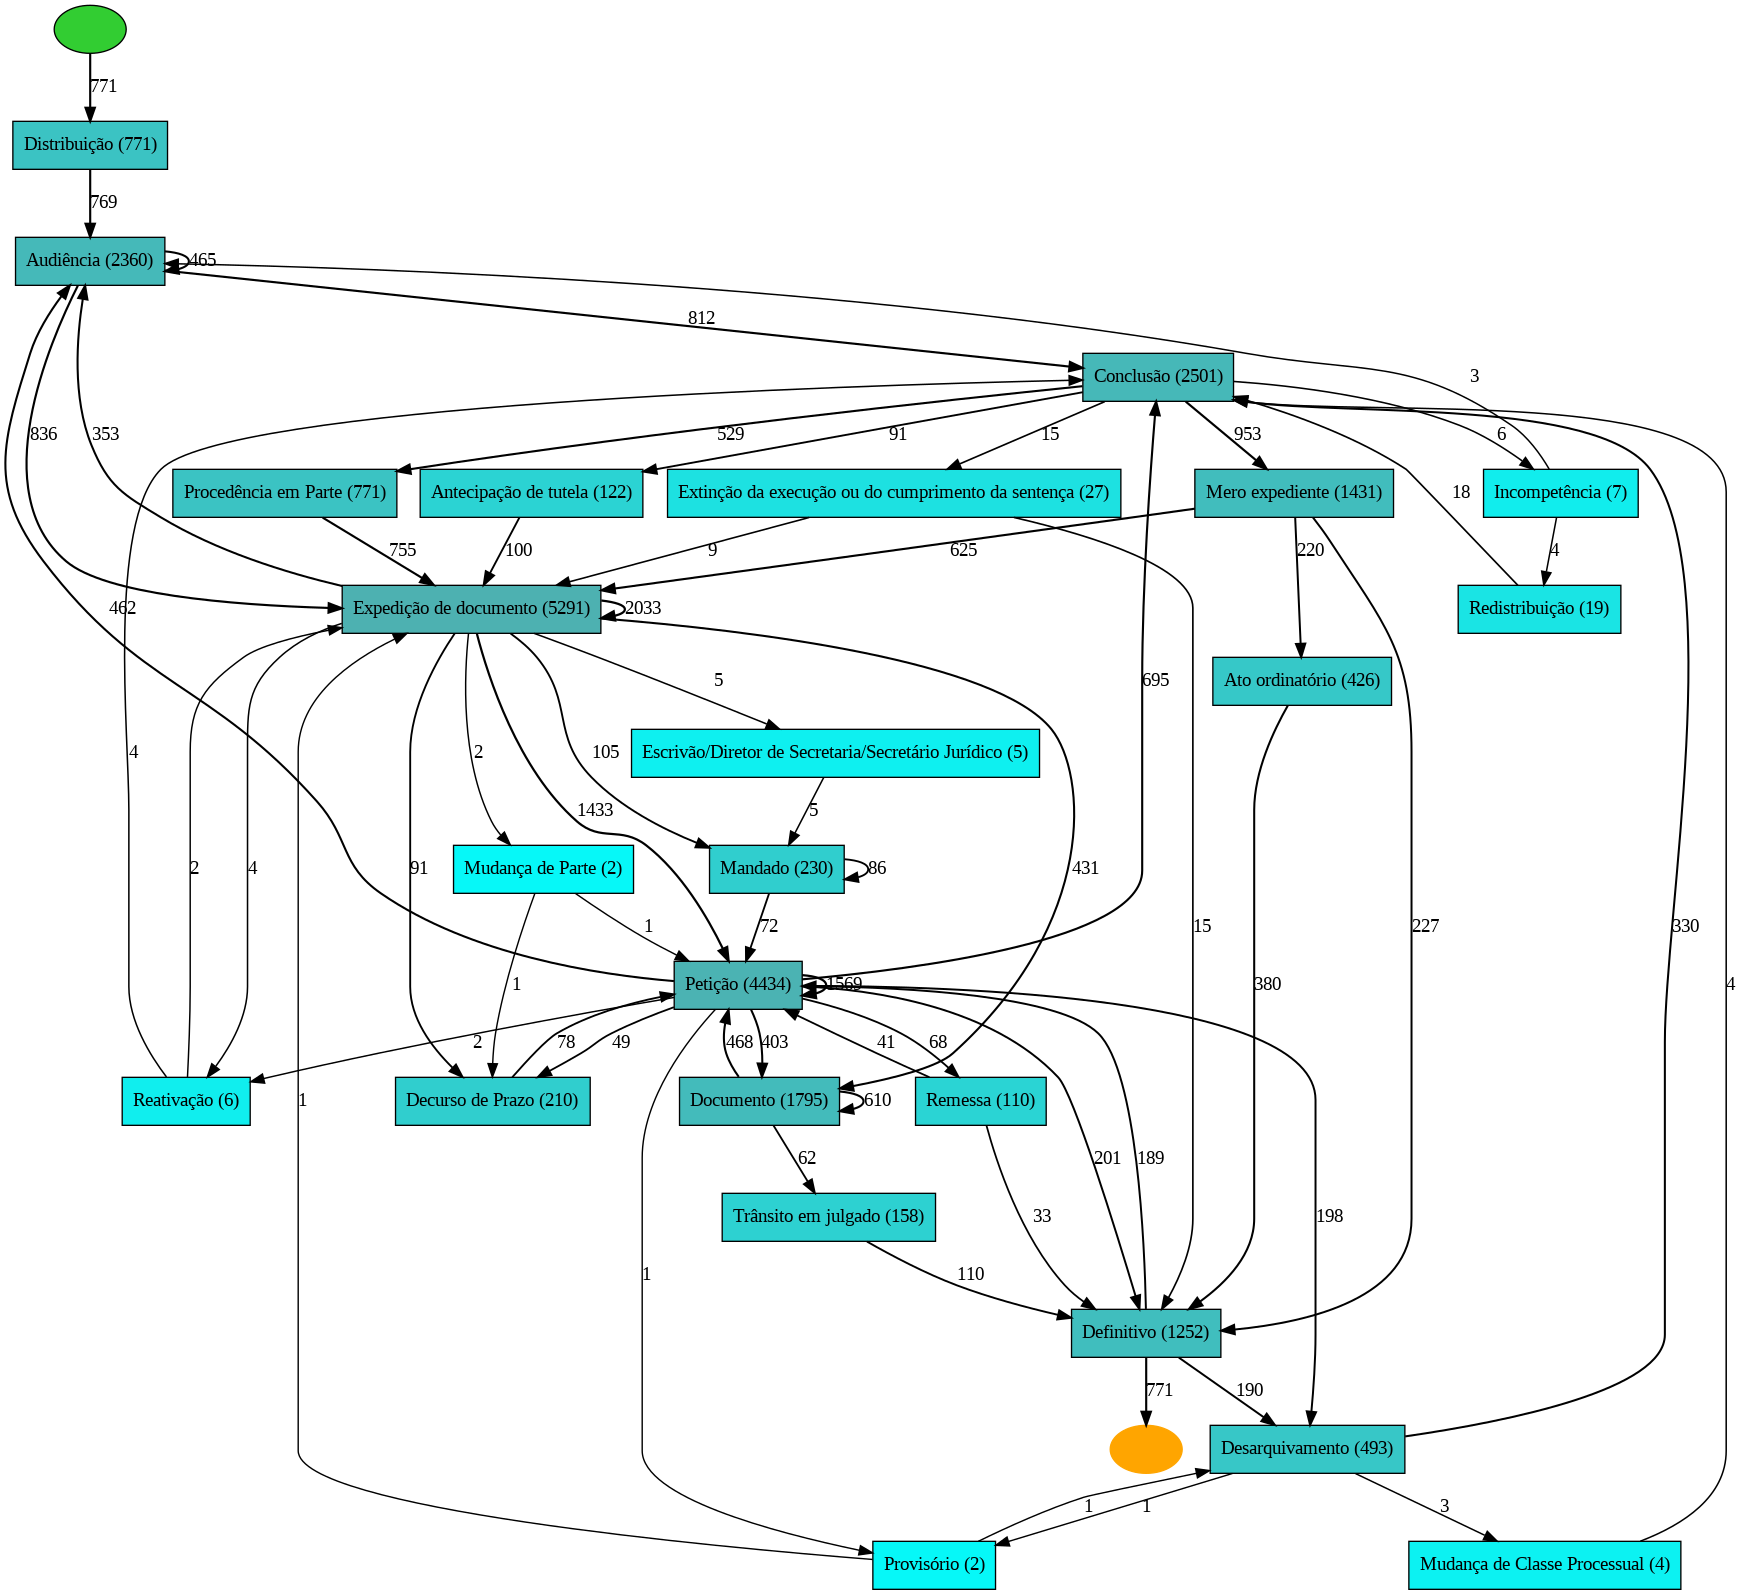

In [ ]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

parameters = {
    "dfg_pre_cleaning_noise_thresh": 0.40
}

for cluster in top_clusters["Cluster Label"]:
  c0 = get_cluster_events(df, activity_profile_no_outliers, cluster)
  heu_net = hm.apply_heu(c0,  parameters)

  gviz = hn_visualizer.apply(heu_net)
  print("############# Cluster "+str(cluster)+" ###############")
  hn_visualizer.view(gviz)



In [ ]:
from pm4py import discover_petri_net_inductive

clusters_threshold: list[float] = []
best_cluster_cases: list[tuple] = []
cluster_models: list[tuple] = []

#activity_profile_no_outliers['']

activity_profile_no_outliers = activity_profile_no_outliers[activity_profile_no_outliers['cluster'].isin(top_labels)]

cluster_names = sorted(activity_profile_no_outliers["cluster"].unique())
for c_name in cluster_names:
    cluster_events = get_cluster_events(df, activity_profile_no_outliers, c_name)
    heu_net = hm.apply_heu(cluster_events,  parameters)
    pn_items = convert_to_petri_net(heu_net)
    # pn_items = discover_petri_net_inductive(cluster_events, True)
    cluster_models.append((c_name, pn_items, cluster_events))

for c_name, pn_items, events in cluster_models:
    best_case, c_threshold = get_cluster_fitness_metrics(events, pn_items)
    clusters_threshold.append(c_threshold)
    best_cluster_cases.append((best_case, pn_items))
    print(f"\nCluster {c_name}: {best_case} with distance of {c_threshold}")

pd.DataFrame([clusters_threshold])

  0%|          | 0/2655 [00:00<?, ?it/s]


Cluster -1: 25259815 with distance of 0.07340553549939832


  0%|          | 0/1254 [00:00<?, ?it/s]


Cluster 0: 27168800 with distance of 0.16554054054054057


  0%|          | 0/771 [00:00<?, ?it/s]


Cluster 1: 25215424 with distance of 0.18042813455657492


  0%|          | 0/1577 [00:00<?, ?it/s]


Cluster 2: 23931531 with distance of 0.5


0         1         2    3
0  0.073406  0.165541  0.180428  0.5

In [ ]:
matrix_values: list[list[float]] = [[] for x in range(len(best_cluster_cases))]
matrix_threshold: list[list[float]] = [[] for x in range(len(best_cluster_cases))]

for index_1, (case_id_1, _) in enumerate(best_cluster_cases):
  threshold = clusters_threshold[index_1]
  for index_2, (case_id_2, petri_net) in enumerate(best_cluster_cases):
    if case_id_1 is None or case_id_2 is None:
      matrix_values[index_1].append(0)
      matrix_threshold[index_1].append(True)
    else:
      _, score = get_case_avg_fitness((df, case_id_1, petri_net))

      matrix_values[index_1].append(score)
      matrix_threshold[index_1].append(threshold > score)
  matrix_values[index_1].append(threshold)

replaying log with TBR, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/43 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/43 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/43 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/43 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/41 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/41 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/41 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/41 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/20 [00:00<?, ?it/s]

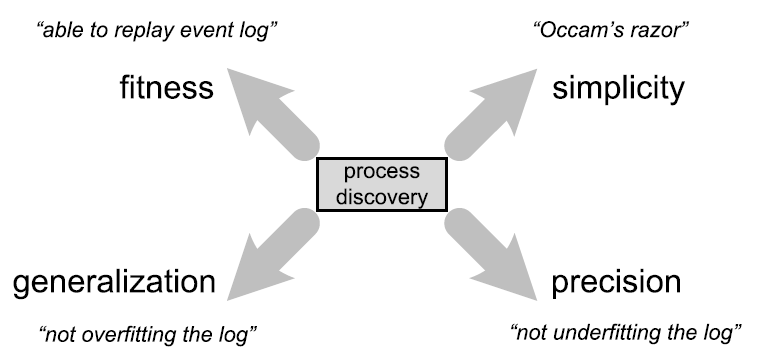

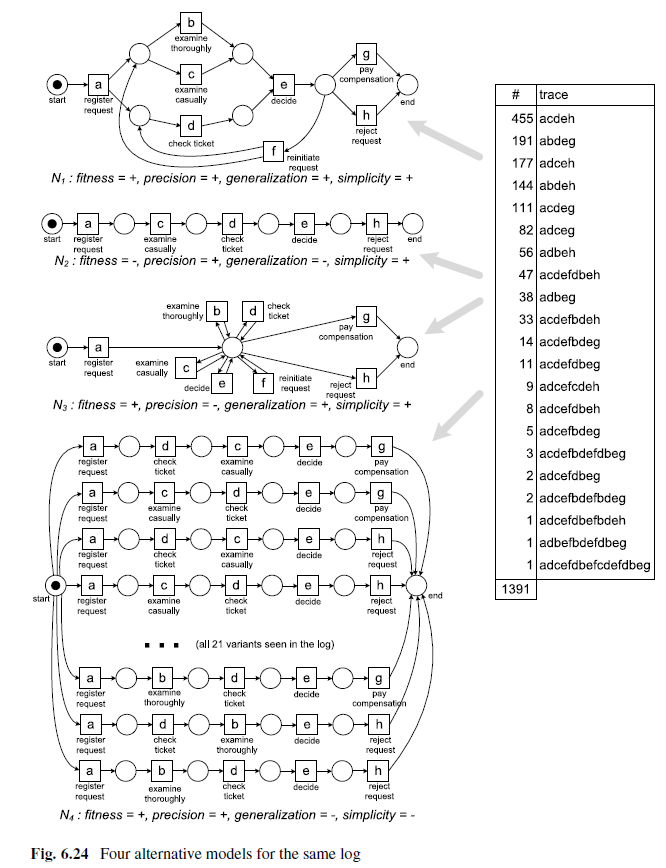

In [ ]:
from pm4py.algo.evaluation.replay_fitness.variants import token_replay as fitness_token_based

fitness_list = list()

heu_net = hm.apply_heu(df,  parameters)
pn_items = convert_to_petri_net(heu_net)

case_ids = activity_profile_1.index
fitness_score = fitness_token_based.apply(df, *pn_items)["average_trace_fitness"]
precision_score = precision_token_based.apply(df, *pn_items)
f1 = f1_score(df, *pn_items)["fscore"]

act_volume = df.groupby(CASE_NAME).size().mean()
fitness_list.append(('R', act_volume, fitness_score, precision_score, f1))


for cluster_id in cluster_names:
  c_events = get_cluster_events(df, activity_profile_no_outliers, cluster_id)

  heu_net = hm.apply_heu(c_events,  parameters)
  pn_items = convert_to_petri_net(heu_net)

  case_ids = activity_profile_no_outliers[activity_profile_no_outliers["cluster"] == cluster_id].index
  fitness_score = fitness_token_based.apply(c_events, *pn_items)["average_trace_fitness"]
  precision_score = precision_token_based.apply(c_events, *pn_items)
  f1 = f1_score(c_events, *pn_items)["fscore"]

  act_volume = c_events.groupby(CASE_NAME).size().mean()
  fitness_list.append((str(cluster_id), act_volume, fitness_score, precision_score, f1))

fitness_df = pd.DataFrame(fitness_list, columns=["cluster", "mean_volume", "fitness", "precision", "f1"])

fitness_df = fitness_df.sort_values(by="cluster", ascending=True)
top_clusters.sort_values(by="Cluster Label", ascending=True, inplace=True)

# Redefinir os índices de ambos os DataFrames para garantir que estejam alinhados
fitness_df = fitness_df.reset_index(drop=True)
top_clusters = top_clusters.reset_index(drop=True)
simplicity_top_clusters = simplicity_top_clusters.reset_index(drop=True)

fitness_df['simplicity'] = simplicity_top_clusters['simplicity']
fitness_df['silhouette'] = top_clusters['Average Silhouette Score']
fitness_df


replaying log with TBR, completed traces ::   0%|          | 0/6928 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/161471 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6928 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/161471 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2603 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/91885 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2603 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/91885 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1159 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/15327 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1159 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/15327 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/765 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/15777 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/765 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/15777 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/985 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6315 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/985 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6315 [00:00<?, ?it/s]

<ipython-input-64-d8a92f4d7702>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_clusters.sort_values(by="Cluster Label", ascending=True, inplace=True)


cluster  mean_volume   fitness  precision        f1  simplicity  silhouette
0      -1    43.366855  0.937675   0.251139  0.290861   -0.000000   -0.270449
1       0    21.473684  0.919202   0.512834  0.511263    0.113253    0.401224
2       1    29.088197  0.928987   0.570007  0.515907    0.850602    0.293172
3       2    12.159163  0.877579   0.977614  0.904474    0.848193    0.717237
4       R    30.667708  0.905799   0.309249  0.410289    1.000000         NaN

#Geração das tabelas

In [ ]:
n_top_atividades = 40

# Remover a coluna 'silhouette' do DataFrame
df_description = activity_profile_1.drop(["silhouette"], axis=1)

# Garantir que todos os dados possam ser comparados como números
df_description = df_description.apply(pd.to_numeric, errors='coerce')

# Extrair a coluna de cluster
clusters = df_description['cluster']

df_description.drop(['cluster'], axis=1, inplace=True)

# Calcular a soma de cada atividade no dataset completo
total_ativ_por_atividade = df_description.sum()

# Selecionar as N atividades mais frequentes
top_atividades = total_ativ_por_atividade.nlargest(n_top_atividades).index

# Filtrar o DataFrame para incluir apenas as atividades mais frequentes
df_filtrado = df_description[top_atividades]

# Calcular o número total de processos
total_processos = len(df_description)

# Calcular a proporção global de cada uma das N atividades mais frequentes
prop_ativ_total = total_ativ_por_atividade[top_atividades] / total_processos

# Calcular a soma de atividades por cluster
total_ativ_por_cluster = df_filtrado.join(clusters).groupby('cluster').sum()

# Calcular o número de processos por cluster
n_processos_por_cluster = clusters.value_counts()

# Calcular a proporção de atividades por cluster, normalizado pelo número de processos
prop_ativ_por_cluster = total_ativ_por_cluster.div(n_processos_por_cluster, axis=0)

# Calcular o Lift por cluster, normalizado
lift_por_cluster = prop_ativ_por_cluster.div(prop_ativ_total, axis=1)

# Substituir NaN por 0
lift_por_cluster = lift_por_cluster.fillna(0)




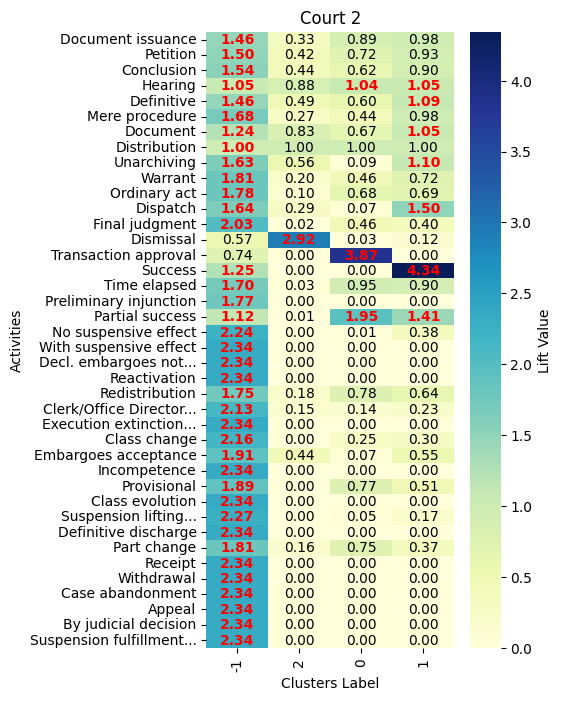

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de clusters que deseja visualizar

# Filtrar o DataFrame para incluir apenas os clusters da lista
lift_por_cluster_filtrado = lift_por_cluster.loc[top_labels]

# Transpor o DataFrame para que os clusters sejam as linhas e as atividades as colunas
lift_por_cluster_transposto = lift_por_cluster_filtrado.transpose()

# Remover linhas onde todos os valores são zero
lift_por_cluster_transposto = lift_por_cluster_transposto.loc[~(lift_por_cluster_transposto == 0).all(axis=1)]

lift_por_cluster_transposto.index = ['Document issuance', 'Petition', 'Conclusion', 'Hearing',
 'Definitive', 'Mere procedure', 'Document', 'Distribution',
 'Unarchiving', 'Warrant', 'Ordinary act', 'Dispatch',
 'Final judgment', 'Dismissal', 'Transaction approval',
 'Success', 'Time elapsed', 'Preliminary injunction',
 'Partial success', 'No suspensive effect',
 'With suspensive effect', 'Decl. embargoes not...',
 'Reactivation', 'Redistribution',
 'Clerk/Office Director...', 'Execution extinction...',
 'Class change', 'Embargoes acceptance',
 'Incompetence', 'Provisional', 'Class evolution',
 'Suspension lifting...', 'Definitive discharge',
 'Part change', 'Receipt', 'Withdrawal', 'Case abandonment',
 'Appeal', 'By judicial decision',
 'Suspension fulfillment...']

# Exibir o heatmap do Lift para os clusters selecionados
plt.figure(figsize=(4, 8))  # Ajuste o tamanho da figura conforme necessário

# Gerar o heatmap com configurações básicas para posteriormente ajustar as anotações
ax = sns.heatmap(lift_por_cluster_transposto, cmap="YlGnBu", annot=True, fmt=".2f",
                 cbar_kws={'label': 'Lift Value'})

# Após a criação do heatmap, ajustar a cor e o peso da fonte nas anotações
for i, j in np.ndindex(lift_por_cluster_transposto.shape):
    value = lift_por_cluster_transposto.iat[i, j]  # Usar iat para acesso rápido a elementos do DataFrame
    text = ax.texts[i * lift_por_cluster_transposto.shape[1] + j]
    text.set_color('red' if value > 1 else 'black')
    text.set_weight('bold' if value > 1 else 'normal')

# Adicionar título e rótulos
plt.title("Court 2")
plt.xlabel("Clusters Label")
plt.ylabel("Activities")

# Rotacionar as labels das atividades (eixo X) em 90 graus
plt.xticks(rotation=90)  # Rótulos de atividades no eixo X (vertical)
plt.yticks(rotation=0)   # Rótulos dos clusters no eixo Y (horizontal)

# Exibir a visualização
plt.show()


In [ ]:
lift_por_cluster_transposto.index

Index(['Document issuance', 'Petition', 'Conclusion', 'Hearing', 'Definitive',
       'Mere procedure', 'Document', 'Distribution', 'Unarchiving', 'Warrant',
       'Ordinary act', 'Dispatch', 'Final judgment', 'Dismissal',
       'Transaction approval', 'Success', 'Time elapsed',
       'Preliminary injunction', 'Partial success', 'No suspensive effect',
       'With suspensive effect', 'Decl. embargoes not...', 'Reactivation',
       'Redistribution', 'Clerk/Office Director...', 'Execution extinction...',
       'Class change', 'Embargoes acceptance', 'Incompetence', 'Provisional',
       'Class evolution', 'Suspension lifting...', 'Definitive discharge',
       'Part change', 'Receipt', 'Withdrawal', 'Case abandonment', 'Appeal',
       'By judicial decision', 'Suspension fulfillment...'],
      dtype='object')

In [ ]:
"""# Remover a coluna 'silhouette' do DataFrame
df_description = activity_profile_1.drop(["silhouette"], axis=1)

# Passo 1: Calcular a soma de atividades por cluster
total_ativ_por_cluster = df_description.groupby('cluster').sum()

# Passo 2: Calcular a soma de cada atividade no dataset completo (não por cluster)
total_ativ_por_atividade = df_description.drop(columns='cluster').sum(axis=0)

# Passo 3: Selecionar as N atividades mais frequentes (as atividades mais comuns no dataset)
top_atividades = total_ativ_por_atividade.nlargest(n_top_atividades).index

# Filtrar o DataFrame para incluir apenas as atividades mais frequentes (preservando a coluna de 'cluster')
df_filtrado = df_description[['cluster'] + list(top_atividades)]

# Passo 4: Calcular a soma total de atividades por cluster (após o filtro)
total_ativ_por_cluster = df_filtrado.groupby('cluster').sum()

# Passo 5: Calcular a soma total de atividades por cluster
total_ativ_cluster = total_ativ_por_cluster.sum(axis=1)

# Passo 6: Calcular a proporção de atividades por cluster
prop_ativ_por_cluster = total_ativ_por_cluster.div(total_ativ_cluster, axis=0)

# Passo 7: Calcular a proporção global de cada uma das N atividades mais frequentes
total_ativ_total = total_ativ_por_atividade[top_atividades].sum()
prop_ativ_total = total_ativ_por_atividade[top_atividades] / total_ativ_total

# Passo 8: Calcular o Lift por cluster
lift_por_cluster = prop_ativ_por_cluster.div(prop_ativ_total, axis=1)

# Substituir NaN por 0
lift_por_cluster = lift_por_cluster.fillna(0)

import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de clusters que deseja visualizar

# Filtrar o DataFrame para incluir apenas os clusters da lista
lift_por_cluster_filtrado = lift_por_cluster.loc[top_labels]

# Transpor o DataFrame para que os clusters sejam as linhas e as atividades as colunas
lift_por_cluster_transposto = lift_por_cluster_filtrado.transpose()

# Remover linhas onde todos os valores são zero
lift_por_cluster_transposto = lift_por_cluster_transposto.loc[~(lift_por_cluster_transposto == 0).all(axis=1)]

# Exibir o heatmap do Lift para os clusters selecionados
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura conforme necessário

# Gerar o heatmap
sns.heatmap(lift_por_cluster_transposto, cmap="YlGnBu", annot=True, fmt=".2f")

# Adicionar título e rótulos
plt.title("Heatmap do Lift por Cluster (clusters selecionados)")
plt.xlabel("Atividade")
plt.ylabel("Cluster Label")

# Rotacionar as labels das atividades (eixo X) em 90 graus
plt.xticks(rotation=90)  # Rótulos de atividades no eixo X (vertical)
plt.yticks(rotation=0)   # Rótulos dos clusters no eixo Y (horizontal)

# Exibir a visualização
plt.show()"""


'# Remover a coluna \'silhouette\' do DataFrame\ndf_description = activity_profile_1.drop(["silhouette"], axis=1)\n\n# Passo 1: Calcular a soma de atividades por cluster\ntotal_ativ_por_cluster = df_description.groupby(\'cluster\').sum()\n\n# Passo 2: Calcular a soma de cada atividade no dataset completo (não por cluster)\ntotal_ativ_por_atividade = df_description.drop(columns=\'cluster\').sum(axis=0)\n\n# Passo 3: Selecionar as N atividades mais frequentes (as atividades mais comuns no dataset)\ntop_atividades = total_ativ_por_atividade.nlargest(n_top_atividades).index\n\n# Filtrar o DataFrame para incluir apenas as atividades mais frequentes (preservando a coluna de \'cluster\')\ndf_filtrado = df_description[[\'cluster\'] + list(top_atividades)]\n\n# Passo 4: Calcular a soma total de atividades por cluster (após o filtro)\ntotal_ativ_por_cluster = df_filtrado.groupby(\'cluster\').sum()\n\n# Passo 5: Calcular a soma total de atividades por cluster\ntotal_ativ_cluster = total_ativ_por_

In [ ]:
def lift(cluster_cases, num_clusters, idx):
  return lift_TOS_TOM(cluster_cases, num_clusters, idx)

In [ ]:
# #(num_atv_cluster)/(total/n_clusters)
# def lift_TOS_TOM(cluster_cases, num_clusters, idx):

#   tos = cluster_cases.loc[idx, 'Number of times this activity appears in cluster']/cluster_cases.loc[idx, 'Total number of cases in cluster']

#   tom = cluster_cases.loc[idx, 'Total activity in court']/num_clusters

#   #multiplica por 100 devido a ordem de grandeza
#   return ((round(tos/tom, 2))*100)

In [ ]:
#(num_atv_cluster)/(total/n_clusters)
def lift_TOS_TOM(cluster_cases, num_clusters, idx):

  tos = cluster_cases.loc[idx, 'Number of times this activity appears in cluster']

  tom = cluster_cases.loc[idx, 'Total activity in court']/num_clusters

  return (round(tos/tom, 2))

In [ ]:
def apply_thresh_frequency(activity_profile, frequency_thresh):

  activities = activity_profile['Activity'].unique()

  activities = sorted(activities, key=lambda x:x[3], reverse=True)

  activities = activities[:int(len(activities)*frequency_thresh)]

  return activity_profile[activity_profile['Activity'].isin(activities)]

In [ ]:
#clusters with silhouette score > mean in court & all clusters
def simplified_list(court):
  simplified_list: list[dict[str, str | float]] = list()

  activities = court.drop(['cluster', 'silhouette'], axis=1).columns
  for activity in activities:
    #activity = activity.capitalize()

    for n_cluster in np.sort(court["cluster"].unique()):

      #activities per cluster
      activity_column = court.loc[court["cluster"]==n_cluster, activity]

      #total activity number per court
      total_activity_column = court.loc[:, activity].sum()

      #total number of cases per cluster
      total_cases_cluster = court.loc[court["cluster"]==n_cluster, "cluster"].count()

      #mean silhouette score in cluster
      silhouette_score_cluster = court[court['cluster'] == n_cluster]['silhouette'].mean()

      simplified_list.append({
          'cluster': int(n_cluster),
          'Activity': activity,
          'Number of times this activity appears in cluster': activity_column.sum(),
          'Total activity in court': total_activity_column,
          'Total number of cases in cluster': total_cases_cluster,
          'silhouette': silhouette_score_cluster,
      })

  return pd.DataFrame(simplified_list)

In [ ]:
def create_table(simplified_courts, similarity_quality_thresh, max_clusters, activity_diff_num, frequency_thresh):
  for i in range(len(simplified_courts)):
    simplified_courts[i] = apply_thresh_frequency(simplified_courts[i], frequency_thresh)

  table_lift = {}

  table_courts = [{}, {}, {}]

  num_clusters = 20

  #Passo 1: Procurar clusters com mais processos (cases)
  #considerar apenas clusters com silhouette score > média

  for court in range(1):

      activity_profile = simplified_courts[court]

      table_court = table_courts[court]

      #Procurar os clusters que tiveram mais cases
      clusters = activity_profile.sort_values(by='Total number of cases in cluster', ascending=False)['cluster'].unique()

      cluster_sizes = {}
      for cluster in clusters:
        cluster_sizes[cluster] = activity_profile[activity_profile['cluster'] == cluster]['Total number of cases in cluster'].unique()[0]

      cluster_sizes = pd.Series(cluster_sizes, index=clusters)

      for cluster_id, count in cluster_sizes.items():

        #Encontrar clusters similares
        similar_clusters = cluster_sizes[(cluster_sizes >= count * (1 - similarity_quality_thresh)) &
                                        (cluster_sizes <= count * (1 + similarity_quality_thresh))]


        #se tiver uma quantidade similar de casos
        if len(similar_clusters) > 1:
          clusters_silhouette = {}

          for c, count in similar_clusters.items():

            if (f'Court {court+1}', f'{c}') in table_court.keys():
              similar_clusters = similar_clusters.drop(c)
              continue

            #calcula o silhouette score
            clusters_silhouette[c] = activity_profile[activity_profile['cluster'] == c]['silhouette'].mean()

          #Passo 2: selecionar o cluster com maior silhoutte score
          chosen_cluster = max(clusters_silhouette, key=clusters_silhouette.get)
          table_court[(f'Court {court+1}', f'{chosen_cluster}')] = []


        #se não tiver clusters similares
        else:
          table_court[(f'Court {court+1}', f'{cluster_id}')] = []

        #se atingir a quantidade max (desejada) de clusters por unidade
        if (len(table_court.items()) >= max_clusters) or (len(table_court.items()) >= cluster_sizes.size):
            table_court = sorted(table_court.items(), key=lambda x: x[0][1])
            table_lift.update(table_court)
            break

  #Passo 3: encontrar as atividades mais positivamente atrelado ao cluster (maior lift)

  #atividades selecionadas por unidade
  selected_activities = [[], [], []]

  selected_activities_qtd = []

  for (court, cluster), lifts in table_lift.items():
    court = int(court.split()[1])
    courtIdx = court - 1
    cluster = int(cluster)

    lifts_qdt = {}

    #Calcular lift
    cluster_cases = simplified_courts[courtIdx][simplified_courts[courtIdx]['cluster'] == cluster]

    #Calcular lift para cada atividade
    for idx in cluster_cases.index:
      activity = cluster_cases.loc[idx, 'Activity']

      if cluster_cases.loc[idx, 'Total activity in court'] > 0:
        lifts_qdt[activity] = lift(cluster_cases, num_clusters, idx)

    #selecionar atividades mais positivamente atreladas ao cluster
    top_activities_qtd = sorted(lifts_qdt.items(), key=lambda x: x[1], reverse=True)[:activity_diff_num]
    for activity in top_activities_qtd:

      if activity[0] not in selected_activities_qtd:
        selected_activities_qtd.append(activity[0])

      if activity[0] not in selected_activities[courtIdx]:
        selected_activities[courtIdx].append(activity[0])

  # Adicionar os lifts à tabela
  selected_activities_qtd.sort()
  for n in range(len(selected_activities)):
    selected_activities[n].sort()


  #recalcular os valores dos lifts para todas as atividades selecionadas
  for (court, cluster), lifts in table_lift.items():
    court = int(court.split()[1])
    courtIdx = court - 1
    cluster = int(cluster)

    table_lift[(f'Court {court}', f'{cluster}')] = []
    table_courts[courtIdx][(f'Court {court}', f'{cluster}')] = []

    cluster_cases = simplified_courts[courtIdx][simplified_courts[courtIdx]['cluster'] == cluster]

    for activity in selected_activities_qtd:
      qtd = cluster_cases[cluster_cases['Activity'] == activity]['Number of times this activity appears in cluster']
      if qtd.empty:
        qtd = 0
        table_lift[(f'Court {court}', f'{cluster}')].append(0.00)

        if activity in selected_activities[courtIdx]:
          table_courts[courtIdx][(f'Court {court}', f'{cluster}')].append(0.00)

      else:
        qtd = qtd.values[0]
        idx = cluster_cases[cluster_cases['Activity'] == activity].index.values[0]

        table_lift[(f'Court {court}', f'{cluster}')].append(lift(cluster_cases, num_clusters, idx))

        if activity in selected_activities[courtIdx]:
          table_courts[courtIdx][(f'Court {court}', f'{cluster}')].append(lift(cluster_cases, num_clusters, idx))


  #criar dataframes

  #todas as unidades
  table_lift['Activities'] = selected_activities_qtd
  table_qtd_df = pd.DataFrame(data=table_lift, index=table_lift['Activities'])
  table_qtd_df.set_index('Activities', inplace=True)

  #para cada unidade
  for n in range(len(selected_activities)):
    table_courts[n]['Activities'] = selected_activities[n]


  courts_df_1 = pd.DataFrame(data=table_courts[0], index=table_courts[0]['Activities'])
  courts_df_1.set_index('Activities', inplace=True)
  courts_df_2 = pd.DataFrame(data=table_courts[1], index=table_courts[1]['Activities'])
  courts_df_2.set_index('Activities', inplace=True)
  courts_df_3 = pd.DataFrame(data=table_courts[2], index=table_courts[2]['Activities'])
  courts_df_3.set_index('Activities', inplace=True)

  return courts_df_1, courts_df_2, courts_df_3

In [ ]:
simplified_courts = [simplified_list(activity_profile_no_outliers)]

In [ ]:
c1_p1, c2_p1, c3_p1 = create_table(simplified_courts.copy(), similarity_quality_thresh=0.1, max_clusters=10, activity_diff_num=20, frequency_thresh=1)

In [ ]:
import pandas as pd

thresh_min = 2

# destacar os valores dentro do limiar
def highlight_with_threshold(s, thresh_min):
    max_value = s.max()
    return [
        'background-color: darkblue' if value >= thresh_min else ''
        for value in s
    ]

# função para plotar tabela
def plot_table(table_qtd_df, thresh_min=thresh_min):
  # Renomear as colunas
  table_qtd_df.columns = pd.MultiIndex.from_tuples(table_qtd_df.columns)
  table_qtd_df = table_qtd_df.reindex(
      columns=sorted(table_qtd_df.columns, key=lambda x: (x[0], x[1]))
  )

  table_ploted = (
      table_qtd_df.style
      .apply(highlight_with_threshold, thresh_min=thresh_min, axis=1)
      .format(precision=2)
      .set_properties(**{'text-align': 'center'})
  )
  return table_ploted

In [ ]:
plot_table(c1_p1)